In [1]:
using DataFrames, CSV, CairoMakie

function _dat2csv(dat_path::AbstractString, csv_path::AbstractString)
    open(csv_path, write=true) do io
        for line in eachline(dat_path)
            join(io, split(line), ',')
            println(io)
        end
    end
    return csv_path
end

function dat2csv(dat_path::AbstractString)
    base, ext = splitext(dat_path)
    ext == ".dat" ||
        throw(ArgumentError("file name doesn't end with `.dat`"))
    return _dat2csv(dat_path, "$base.csv")
end

dat2csv (generic function with 1 method)

  0.871801 seconds (5.84 M allocations: 225.531 MiB, 4.77% gc time, 11.07% compilation time)


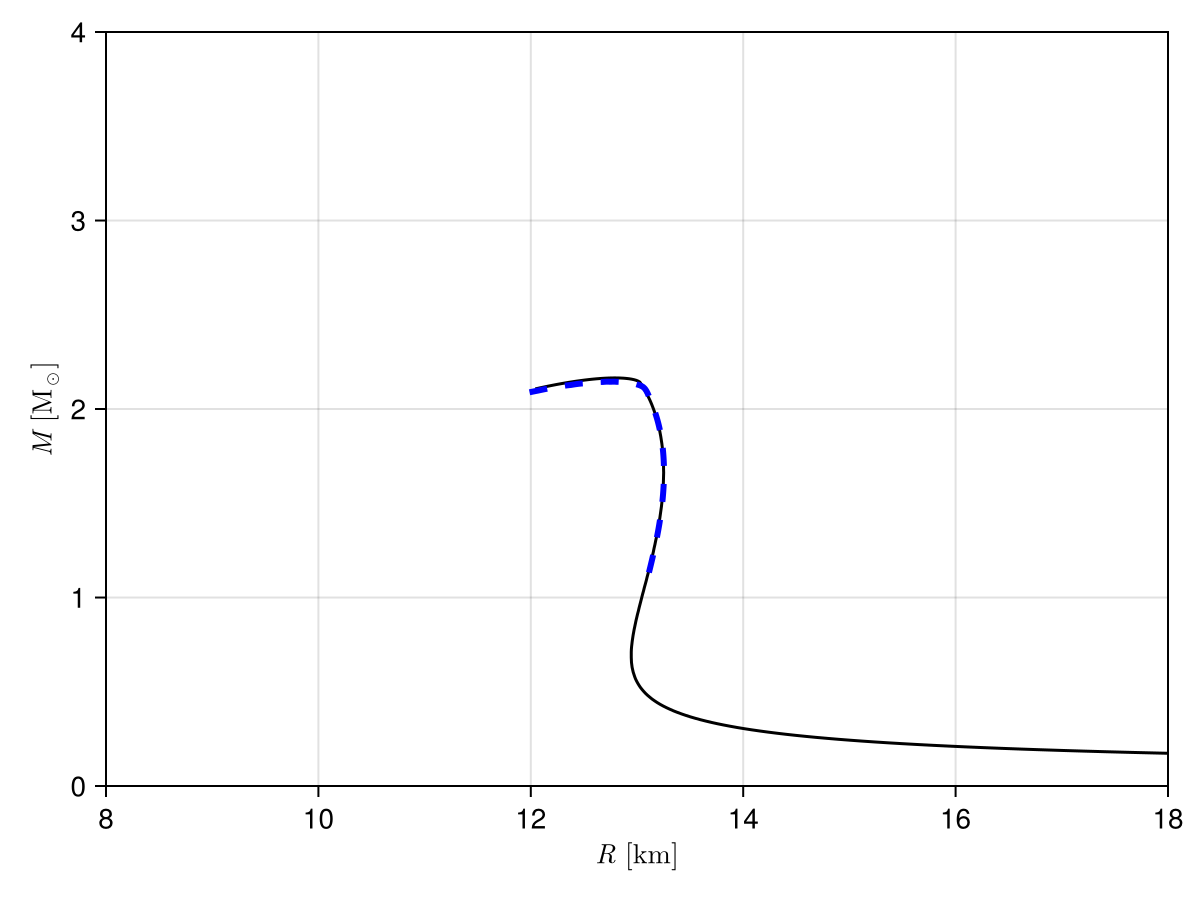

In [7]:
include("tov_diagram.jl")

# eosdf = CSV.File("abht/eos.csv") |> DataFrame
# eosdf = CSV.File("bhk/eos.csv") |> DataFrame
# eosdf = CSV.File("cmf/eos.csv") |> DataFrame
eosdf = CSV.File("dd2-frg/eos_new.csv") |> DataFrame
# Pvec = eosdf[:,4]
# epsvec = eosdf[:,5]
Pvec = eosdf[:,1]
epsvec = eosdf[:,2]

# mymrdf = CSV.File("abht/mrdiagram.csv") |> DataFrame
# mymrdf = CSV.File("bhk/mrdiagram.csv") |> DataFrame

# eps = 3.5e-18 # abht
# eps = 4e-20 # bhk
# eps = 2e-20 # cmf
eps = 1.4e-19 # dd2frg
n = 200
@time P0, R, M = MR_diagram(Pvec, epsvec, n, eps)

outdf = DataFrame(P0=P0, R=R, M=M)

# CSV.write("mrdiagramabht.csv", outdf)
# CSV.write("mrdiagramabhk.csv", outdf)
# CSV.write("mrdiagramcmf.csv", outdf)
CSV.write("mrdiagramdd2-frg.csv", outdf)

# dat2csv("composemrabht.dat")
# composemrdf = CSV.File("composemrabht.csv") |> DataFrame

# dat2csv("composemrbhk.dat")
# composemrdf = CSV.File("composemrbhk.csv") |> DataFrame

# dat2csv("composemrcmf.dat")
# composemrdf = CSV.File("composemrcmf.csv") |> DataFrame

dat2csv("composemrdd2-frg.dat")
composemrdf = CSV.File("composemrdd2-frg.csv") |> DataFrame

fig = Figure()

ax = Axis(fig[1, 1],
    xlabel=L"$R$ [km]",
    ylabel=L"$M$ [M$_\odot$]",  
    limits=(8,18,0,4.0)
)

lines!(ax, R, M, color=:black)
# lines!(ax, mymrdf[:,3], mymrdf[:,2], color=:red, linestyle=:dash)
lines!(ax, composemrdf[:,1], composemrdf[:,2], color=:blue, linestyle=:dash, linewidth=3)

fig